In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Đường dẫn đến file CSV
data_path = Path("temp.csv")  # Thay thế đường dẫn thực tế của bạn

# Kiểm tra xem file tồn tại
if data_path.exists():
    print(f"File tồn tại: {data_path}")
    
    # Đọc dữ liệu
    df = pd.read_csv(data_path)
    
    # Hiển thị thông tin cơ bản về dữ liệu
    print("Kích thước dữ liệu:", df.shape)
    print("\n5 dòng đầu tiên:")
    print(df.head())
    
    # Thông tin cột
    print("\nThông tin các cột:")
    print(df.info())
    
    # Thống kê mô tả
    print("\nThống kê mô tả:")
    print(df.describe())
    
    # Kiểm tra giá trị null
    print("\nKiểm tra giá trị null:")
    print(df.isnull().sum())
else:
    print(f"File không tồn tại: {data_path}")

File tồn tại: temp.csv
Kích thước dữ liệu: (803, 4)

5 dòng đầu tiên:
                 Tiêu đề                                       Link Văn Bản  \
0     Hiến pháp Không số  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   
1   Bộ luật 45/2019/QH14  https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...   
2  Bộ luật 100/2015/QH13  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   
3  Bộ luật 101/2015/QH13  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   
4   Bộ luật 95/2015/QH13  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   

                                            Nội dung  \
0  QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...   
1                                  Không có nội dung   
2  QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...   
3  QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...   
4  QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...   

                                             Tóm tắt  
0  Hiến pháp năm 2013 là luật cơ bản của nước Cộn...  
1       

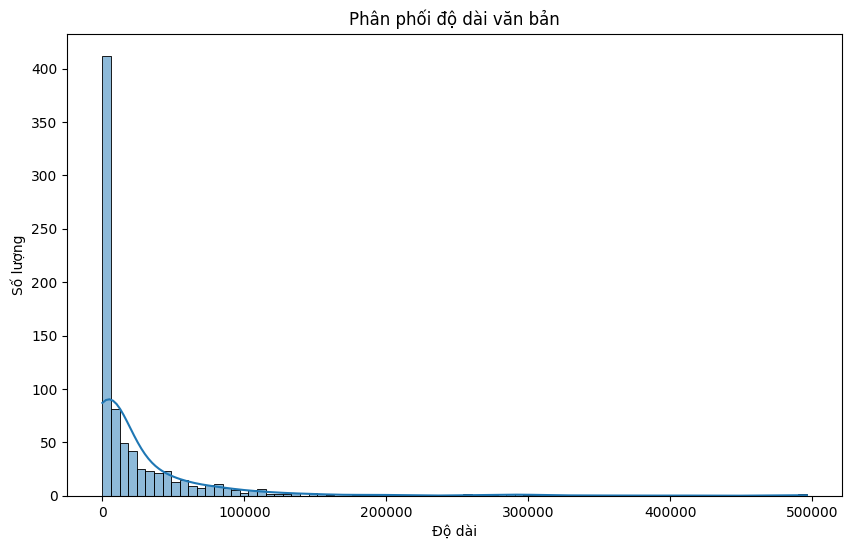

Độ dài văn bản trung bình: 26486.16 ký tự
Độ dài văn bản ngắn nhất: 17 ký tự
Độ dài văn bản dài nhất: 496132 ký tự


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

#Load stopwords từ file txt
# vietnamese_stopwords = open('vietnamese-stopwords.txt', 'r').read().splitlines()


def clean_text(text):
    """Hàm làm sạch văn bản"""
    if isinstance(text, str):
        # Chuyển về chữ thường
        text = text.lower()
        
        # Loại bỏ các ký tự đặc biệt
        text = re.sub(r'[^\w\s]', '', text)
        
        # Loại bỏ số
        # text = re.sub(r'\d+', '', text)
        
        # Loại bỏ khoảng trắng thừa
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    return ""

# Giả sử cột chứa văn bản pháp luật là 'text' và cột chứa tóm tắt là 'summary'
if 'Nội dung' in df.columns:
    df['cleaned_text'] = df['Nội dung'].apply(clean_text)
    
    # Thống kê độ dài văn bản
    df['text_length'] = df['cleaned_text'].apply(len)
    
    # Hiển thị phân phối độ dài văn bản
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], kde=True)
    plt.title('Phân phối độ dài văn bản')
    plt.xlabel('Độ dài')
    plt.ylabel('Số lượng')
    plt.show()
    
    print(f"Độ dài văn bản trung bình: {df['text_length'].mean():.2f} ký tự")
    print(f"Độ dài văn bản ngắn nhất: {df['text_length'].min()} ký tự")
    print(f"Độ dài văn bản dài nhất: {df['text_length'].max()} ký tự")

In [9]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("file_moi1.csv")

# Đổi tên cột
df.rename(columns={"Tóm tắt Cũ": "text", "Tóm tắt Mới": "summary"}, inplace=True)

# Lưu lại file CSV
df.to_csv("file_moi.csv", index=False)


In [11]:
df = pd.read_csv("file_moi.csv")
df.head()

,Tiêu đề,Số hiệu,Ngày ban hành,text,summary
0,CHÍNH\n PHỦ-------,Số: 18/2025/NĐ-CP,"Hà Nội, ngày 08 tháng 02 năm 2025",Nghị định 18/2025/NĐ-CP quy định chi tiết về b...,"Theo Nghị định 18/2025/NĐ-CP, quy định về bảo ..."
1,BỘ\n Y TẾ-------,Số: 04/CT-BYT,"Hà Nội, ngày 07\n tháng 02 năm 2025",Thư Viện Pháp Luật cam kết cung cấp dịch vụ bì...,THƯ VIỆN PHÁP LUẬT cam kết dịch vụ sẽ được cun...
2,THỦ TƯỚNG CHÍNH\n PHỦ-------,Số: 10/CĐ-TTg,"Hà Nội, ngày 07\n tháng 02 năm 2025",Công điện 10/CĐ-TTg của Thủ tướng Chính phủ yê...,Để nâng cao chất lượng quản lý nhà nước về tuy...
3,Không tìm thấy,Không tìm thấy,Không tìm thấy,Thư Viện Pháp Luật cam kết cung cấp dịch vụ bì...,Nội dung chính của văn bản là:\n\nSử dụng công...
4,Không tìm thấy,Không tìm thấy,Không tìm thấy,Thư Viện Pháp Luật thông báo về việc lưu trữ v...,Tôi hiểu yêu cầu của bạn. Bạn muốn tôi lọc một...


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import re
import numpy as np

def load_and_check_data(csv_path):
    """
    Tải và kiểm tra dữ liệu thô từ file CSV
    """
    # Tải dữ liệu
    print(f"Đang tải dữ liệu từ {csv_path}...")
    df = pd.read_csv(csv_path)
    
    # Hiển thị thông tin cơ bản
    print(f"Kích thước dữ liệu: {df.shape}")
    print("\nThông tin các cột:")
    print(df.info())
    
    # Hiển thị một vài mẫu
    print("\nXem 5 mẫu đầu tiên:")
    print(df.head())
    
    # Kiểm tra giá trị null
    null_counts = df.isnull().sum()
    print("\nSố lượng giá trị null:")
    print(null_counts)
    
    # Kiểm tra độ dài của văn bản gốc và tóm tắt
    if 'Nội dung' in df.columns:
        df['text_length'] = df['Nội dung'].apply(lambda x: len(str(x)) if not pd.isna(x) else 0)
        
    if 'Tóm tắt' in df.columns:
        df['summary_length'] = df['Tóm tắt'].apply(lambda x: len(str(x)) if not pd.isna(x) else 0)
    
    # Hiển thị thống kê
    if 'text_length' in df.columns:
        print("\nThống kê độ dài văn bản gốc:")
        print(f"Trung bình: {df['text_length'].mean():.2f} ký tự")
        print(f"Nhỏ nhất: {df['text_length'].min()} ký tự")
        print(f"Lớn nhất: {df['text_length'].max()} ký tự")
        print(f"Trung vị: {df['text_length'].median()} ký tự")
    
    if 'summary_length' in df.columns:
        print("\nThống kê độ dài tóm tắt:")
        print(f"Trung bình: {df['summary_length'].mean():.2f} ký tự")
        print(f"Nhỏ nhất: {df['summary_length'].min()} ký tự")
        print(f"Lớn nhất: {df['summary_length'].max()} ký tự")
        print(f"Trung vị: {df['summary_length'].median()} ký tự")
        
        # Tỉ lệ nén trung bình (compression ratio)
        df['compression_ratio'] = df['summary_length'] / df['text_length']
        print(f"\nTỉ lệ nén trung bình: {df['compression_ratio'].mean():.4f}")
    
    return df

# Sử dụng hàm
df = load_and_check_data("temp.csv")

Đang tải dữ liệu từ temp.csv...
Kích thước dữ liệu: (803, 4)

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tiêu đề       803 non-null    object
 1   Link Văn Bản  803 non-null    object
 2   Nội dung      803 non-null    object
 3   Tóm tắt       803 non-null    object
dtypes: object(4)
memory usage: 25.2+ KB
None

Xem 5 mẫu đầu tiên:
                 Tiêu đề                                       Link Văn Bản  \
0     Hiến pháp Không số  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   
1   Bộ luật 45/2019/QH14  https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...   
2  Bộ luật 100/2015/QH13  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   
3  Bộ luật 101/2015/QH13  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   
4   Bộ luật 95/2015/QH13  https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...   

                     

In [12]:
df.head()

,Tiêu đề,Link Văn Bản,Nội dung,Tóm tắt,text_length,summary_length,compression_ratio
0,Hiến pháp Không số,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,61136,308,0.005038
1,Bộ luật 45/2019/QH14,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Không có nội dung,Không có tóm tắt,17,16,0.941176
2,Bộ luật 100/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,"Bộ luật Hình sự năm 2015 quy định về tội phạm,...",553578,408,0.000737
3,Bộ luật 101/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,520470,371,0.000713
4,Bộ luật 95/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,267890,426,0.001590


In [14]:
def analyze_data_distribution(df):
    """
    Phân tích và vẽ đồ thị phân bố dữ liệu
    """
    output_dir = Path("data_analysis")
    output_dir.mkdir(exist_ok=True)
    
    # Vẽ phân bố độ dài văn bản gốc
    if 'text_length' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['text_length'].dropna(), kde=True)
        plt.title('Phân bố độ dài văn bản gốc')
        plt.xlabel('Số ký tự')
        plt.ylabel('Số lượng')
        plt.savefig(output_dir / 'text_length_distribution.png')
        plt.close()
    
    # Vẽ phân bố độ dài tóm tắt
    if 'summary_length' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['summary_length'].dropna(), kde=True)
        plt.title('Phân bố độ dài tóm tắt')
        plt.xlabel('Số ký tự')
        plt.ylabel('Số lượng')
        plt.savefig(output_dir / 'summary_length_distribution.png')
        plt.close()
    
    # Vẽ mối quan hệ giữa độ dài văn bản gốc và tóm tắt
    if 'text_length' in df.columns and 'summary_length' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='text_length', y='summary_length', data=df, alpha=0.5)
        plt.title('Mối quan hệ giữa độ dài văn bản gốc và tóm tắt')
        plt.xlabel('Độ dài văn bản gốc')
        plt.ylabel('Độ dài tóm tắt')
        plt.savefig(output_dir / 'text_summary_relation.png')
        plt.close()
        
        # Vẽ biểu đồ tỉ lệ nén
        plt.figure(figsize=(10, 6))
        sns.histplot(df['compression_ratio'].dropna(), kde=True)
        plt.title('Phân bố tỉ lệ nén (độ dài tóm tắt / độ dài văn bản)')
        plt.xlabel('Tỉ lệ nén')
        plt.ylabel('Số lượng')
        plt.savefig(output_dir / 'compression_ratio_distribution.png')
        plt.close()
    
    print(f"Đã lưu các biểu đồ phân tích tại thư mục {output_dir}")

# Sử dụng hàm
analyze_data_distribution(df)

Đã lưu các biểu đồ phân tích tại thư mục data_analysis


In [15]:
df.head()

,Tiêu đề,Link Văn Bản,Nội dung,Tóm tắt,text_length,summary_length,compression_ratio
0,Hiến pháp Không số,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,61136,308,0.005038
1,Bộ luật 45/2019/QH14,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Không có nội dung,Không có tóm tắt,17,16,0.941176
2,Bộ luật 100/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,"Bộ luật Hình sự năm 2015 quy định về tội phạm,...",553578,408,0.000737
3,Bộ luật 101/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,520470,371,0.000713
4,Bộ luật 95/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,267890,426,0.001590


In [16]:
from underthesea import text_normalize, word_tokenize

def normalize_vietnamese_text(text):
    """
    Chuẩn hóa văn bản tiếng Việt
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Chuẩn hóa Unicode cho tiếng Việt
    text = text_normalize(text)
    
    # Loại bỏ URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Loại bỏ HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Loại bỏ dấu ngoặc kép/đơn chứa số
    text = re.sub(r'["\'](\d+)["\']', r'\1', text)
    
    # Loại bỏ các ký tự đặc biệt nhưng giữ lại dấu câu tiếng Việt
    text = re.sub(r'[^\w\s.,!?;:()\'"-]', ' ', text)
    
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Chuẩn hóa dấu câu (thêm khoảng trắng sau dấu câu nếu không có)
    text = re.sub(r'([.,!?;:])([\w])', r'\1 \2', text)
    
    return text

def clean_and_normalize_data(df, content_col='Nội dung', summary_col='Tóm tắt'):
    """
    Làm sạch và chuẩn hóa dữ liệu
    """
    print("Đang tiền xử lý dữ liệu...")
    
    # Tạo bản sao để không làm thay đổi dữ liệu gốc
    cleaned_df = df.copy()
    
    # Chuẩn hóa văn bản
    if content_col in cleaned_df.columns:
        cleaned_df['cleaned_content'] = cleaned_df[content_col].apply(normalize_vietnamese_text)
    
    if summary_col in cleaned_df.columns:
        cleaned_df['cleaned_summary'] = cleaned_df[summary_col].apply(normalize_vietnamese_text)
    
    # Kiểm tra văn bản sau khi xử lý
    if 'cleaned_content' in cleaned_df.columns:
        empty_content = (cleaned_df['cleaned_content'] == '').sum()
        print(f"Số lượng văn bản rỗng sau khi xử lý: {empty_content}")
        
        # Cập nhật độ dài
        cleaned_df['cleaned_text_length'] = cleaned_df['cleaned_content'].apply(len)
    
    if 'cleaned_summary' in cleaned_df.columns:
        empty_summary = (cleaned_df['cleaned_summary'] == '').sum()
        print(f"Số lượng tóm tắt rỗng sau khi xử lý: {empty_summary}")
        
        # Cập nhật độ dài
        cleaned_df['cleaned_summary_length'] = cleaned_df['cleaned_summary'].apply(len)
    
    return cleaned_df

# Sử dụng hàm
cleaned_df = clean_and_normalize_data(df)

Đang tiền xử lý dữ liệu...
Số lượng văn bản rỗng sau khi xử lý: 0
Số lượng tóm tắt rỗng sau khi xử lý: 0


In [17]:
cleaned_df.head()

,Tiêu đề,Link Văn Bản,Nội dung,Tóm tắt,text_length,summary_length,compression_ratio,cleaned_content,cleaned_summary,cleaned_text_length,cleaned_summary_length
0,Hiến pháp Không số,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,61136,308,0.005038,QUỐC HỘI Số : Không số CỘNG HÒA XÃ HỘI CHỦ NGH...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,62416,318
1,Bộ luật 45/2019/QH14,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Không có nội dung,Không có tóm tắt,17,16,0.941176,Không có nội dung,Không có tóm tắt,17,16
2,Bộ luật 100/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,"Bộ luật Hình sự năm 2015 quy định về tội phạm,...",553578,408,0.000737,QUỐC HỘI Số : 100 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Hình sự năm 2015 quy định về tội phạm ...,572848,419
3,Bộ luật 101/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,520470,371,0.000713,QUỐC HỘI Số : 101 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,529691,379
4,Bộ luật 95/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,267890,426,0.001590,QUỐC HỘI Số : 95 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,273398,437


In [18]:
cleaned_df = cleaned_df.drop(index=1).reset_index(drop=True)
cleaned_df.to_csv("cleaned_data.csv", index=False)


In [19]:
cleaned_df.head()

,Tiêu đề,Link Văn Bản,Nội dung,Tóm tắt,text_length,summary_length,compression_ratio,cleaned_content,cleaned_summary,cleaned_text_length,cleaned_summary_length
0,Hiến pháp Không số,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,61136,308,0.005038,QUỐC HỘI Số : Không số CỘNG HÒA XÃ HỘI CHỦ NGH...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,62416,318
1,Bộ luật 100/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,"Bộ luật Hình sự năm 2015 quy định về tội phạm,...",553578,408,0.000737,QUỐC HỘI Số : 100 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Hình sự năm 2015 quy định về tội phạm ...,572848,419
2,Bộ luật 101/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,520470,371,0.000713,QUỐC HỘI Số : 101 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,529691,379
3,Bộ luật 95/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,267890,426,0.001590,QUỐC HỘI Số : 95 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,273398,437
4,Bộ luật 92/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 92/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Tố tụng Dân sự 2015 quy định các nguyê...,494279,669,0.001353,QUỐC HỘI Số : 92 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Tố tụng Dân sự 2015 quy định các nguyê...,505409,687


In [23]:
def filter_invalid_data(df, min_text_length=1000, max_text_length=60000, 
                        min_summary_length=10, max_summary_length=10000,
                        min_compression_ratio=0.0005, max_compression_ratio=0.5):
    """
    Lọc dữ liệu không hợp lệ theo điều kiện
    """
    print("Đang lọc dữ liệu không hợp lệ...")
    print(f"Số lượng mẫu ban đầu: {len(df)}")
    
    # Tạo bản sao
    filtered_df = df.copy()
    
    # Lọc theo độ dài văn bản gốc
    if 'cleaned_text_length' in filtered_df.columns:
        filtered_df = filtered_df[
            (filtered_df['cleaned_text_length'] >= min_text_length) & 
            (filtered_df['cleaned_text_length'] <= max_text_length)
        ]
        print(f"Số mẫu sau khi lọc theo độ dài văn bản: {len(filtered_df)}")
    
    # Lọc theo độ dài tóm tắt
    if 'cleaned_summary_length' in filtered_df.columns:
        filtered_df = filtered_df[
            (filtered_df['cleaned_summary_length'] >= min_summary_length) & 
            (filtered_df['cleaned_summary_length'] <= max_summary_length)
        ]
        print(f"Số mẫu sau khi lọc theo độ dài tóm tắt: {len(filtered_df)}")
    
    # Lọc theo tỉ lệ nén
    if 'cleaned_text_length' in filtered_df.columns and 'cleaned_summary_length' in filtered_df.columns:
        filtered_df['compression_ratio'] = filtered_df['cleaned_summary_length'] / filtered_df['cleaned_text_length']
        filtered_df = filtered_df[
            (filtered_df['compression_ratio'] >= min_compression_ratio) & 
            (filtered_df['compression_ratio'] <= max_compression_ratio)
        ]
        print(f"Số mẫu sau khi lọc theo tỉ lệ nén: {len(filtered_df)}")
    
    # Loại bỏ các hàng có tóm tắt giống hệt văn bản gốc
    if 'cleaned_content' in filtered_df.columns and 'cleaned_summary' in filtered_df.columns:
        filtered_df = filtered_df[filtered_df['cleaned_content'] != filtered_df['cleaned_summary']]
        print(f"Số mẫu sau khi loại bỏ tóm tắt giống hệt văn bản gốc: {len(filtered_df)}")
    
    # Lọc trường hợp tóm tắt là một phần của văn bản gốc
    if 'cleaned_content' in filtered_df.columns and 'cleaned_summary' in filtered_df.columns:
        # Kiểm tra xem tóm tắt có phải là một phần liền mạch của văn bản gốc không
        filtered_df = filtered_df[~filtered_df.apply(
            lambda row: row['cleaned_content'].find(row['cleaned_summary']) != -1 
            if isinstance(row['cleaned_content'], str) and isinstance(row['cleaned_summary'], str) 
            else False, 
            axis=1
        )]
        print(f"Số mẫu sau khi loại bỏ tóm tắt là một phần của văn bản gốc: {len(filtered_df)}")
    
    print(f"Tổng số mẫu sau khi lọc: {len(filtered_df)}")
    return filtered_df

# Sử dụng hàm
filtered_df = filter_invalid_data(cleaned_df)

Đang lọc dữ liệu không hợp lệ...
Số lượng mẫu ban đầu: 802
Số mẫu sau khi lọc theo độ dài văn bản: 393
Số mẫu sau khi lọc theo độ dài tóm tắt: 393
Số mẫu sau khi lọc theo tỉ lệ nén: 393
Số mẫu sau khi loại bỏ tóm tắt giống hệt văn bản gốc: 393
Số mẫu sau khi loại bỏ tóm tắt là một phần của văn bản gốc: 393
Tổng số mẫu sau khi lọc: 393


In [24]:
def tokenize_and_analyze_vocab(df, content_col='cleaned_content', summary_col='cleaned_summary'):
    """
    Tách từ và phân tích từ vựng
    """
    print("Đang phân tích từ vựng...")
    
    # Tokenize và thống kê
    if content_col in df.columns:
        print("Đang tokenize văn bản gốc...")
        # Tokenize văn bản gốc
        df['tokenized_content'] = df[content_col].apply(
            lambda x: word_tokenize(x) if isinstance(x, str) else []
        )
        
        # Tính số từ trong văn bản
        df['content_word_count'] = df['tokenized_content'].apply(len)
        
        print(f"Số từ trung bình trong văn bản gốc: {df['content_word_count'].mean():.2f}")
        print(f"Số từ tối thiểu: {df['content_word_count'].min()}")
        print(f"Số từ tối đa: {df['content_word_count'].max()}")
    
    if summary_col in df.columns:
        print("Đang tokenize tóm tắt...")
        # Tokenize tóm tắt
        df['tokenized_summary'] = df[summary_col].apply(
            lambda x: word_tokenize(x) if isinstance(x, str) else []
        )
        
        # Tính số từ trong tóm tắt
        df['summary_word_count'] = df['tokenized_summary'].apply(len)
        
        print(f"Số từ trung bình trong tóm tắt: {df['summary_word_count'].mean():.2f}")
        print(f"Số từ tối thiểu: {df['summary_word_count'].min()}")
        print(f"Số từ tối đa: {df['summary_word_count'].max()}")
    
    # Phân tích từ vựng
    if 'tokenized_content' in df.columns and 'tokenized_summary' in df.columns:
        # Tập hợp tất cả các từ
        all_content_words = []
        all_summary_words = []
        
        for tokens in df['tokenized_content']:
            all_content_words.extend(tokens)
            
        for tokens in df['tokenized_summary']:
            all_summary_words.extend(tokens)
        
        # Tính số lượng từ duy nhất
        unique_content_words = set(all_content_words)
        unique_summary_words = set(all_summary_words)
        
        print(f"Số lượng từ duy nhất trong văn bản gốc: {len(unique_content_words)}")
        print(f"Số lượng từ duy nhất trong tóm tắt: {len(unique_summary_words)}")
        
        # Tính số lượng từ chung
        common_words = unique_content_words.intersection(unique_summary_words)
        print(f"Số lượng từ chung giữa văn bản gốc và tóm tắt: {len(common_words)}")
        
        # Tỉ lệ từ trong tóm tắt cũng xuất hiện trong văn bản gốc
        coverage_ratio = len(common_words) / len(unique_summary_words) if unique_summary_words else 0
        print(f"Tỉ lệ từ trong tóm tắt cũng xuất hiện trong văn bản gốc: {coverage_ratio:.4f}")
    
    return df

# Sử dụng hàm
tokenized_df = tokenize_and_analyze_vocab(cleaned_df)

Đang phân tích từ vựng...
Đang tokenize văn bản gốc...
Số từ trung bình trong văn bản gốc: 4859.43
Số từ tối thiểu: 3
Số từ tối đa: 119160
Đang tokenize tóm tắt...
Số từ trung bình trong tóm tắt: 57.09
Số từ tối thiểu: 3
Số từ tối đa: 119
Số lượng từ duy nhất trong văn bản gốc: 19202
Số lượng từ duy nhất trong tóm tắt: 2671
Số lượng từ chung giữa văn bản gốc và tóm tắt: 2615
Tỉ lệ từ trong tóm tắt cũng xuất hiện trong văn bản gốc: 0.9790


In [25]:
tokenized_df.head()

,Tiêu đề,Link Văn Bản,Nội dung,Tóm tắt,text_length,summary_length,compression_ratio,cleaned_content,cleaned_summary,cleaned_text_length,cleaned_summary_length,tokenized_content,content_word_count,tokenized_summary,summary_word_count
0,Hiến pháp Không số,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,61136,308,0.005038,QUỐC HỘI Số : Không số CỘNG HÒA XÃ HỘI CHỦ NGH...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,62416,318,"[QUỐC HỘI, Số, :, Không, số, CỘNG HÒA, XÃ HỘI ...",9892,"[Hiến pháp, năm, 2013, là, luật, cơ bản, của, ...",50
1,Bộ luật 100/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,"Bộ luật Hình sự năm 2015 quy định về tội phạm,...",553578,408,0.000737,QUỐC HỘI Số : 100 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Hình sự năm 2015 quy định về tội phạm ...,572848,419,"[QUỐC HỘI, Số, :, 100, 2015, QH13, CỘNG HÒA, X...",119160,"[Bộ luật Hình sự, năm, 2015, quy định, về, tội...",65
2,Bộ luật 101/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,520470,371,0.000713,QUỐC HỘI Số : 101 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,529691,379,"[QUỐC HỘI, Số, :, 101, 2015, QH13, CỘNG HÒA, X...",91019,"[Bộ, luật Tố tụng Hình sự, năm, 2015, quy định...",57
3,Bộ luật 95/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,267890,426,0.001590,QUỐC HỘI Số : 95 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,273398,437,"[QUỐC HỘI, Số, :, 95, 2015, QH13, CỘNG HÒA, XÃ...",46901,"[Bộ luật, Hàng hải, Việt Nam, 2015, quy định, ...",69
4,Bộ luật 92/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 92/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Tố tụng Dân sự 2015 quy định các nguyê...,494279,669,0.001353,QUỐC HỘI Số : 92 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Tố tụng Dân sự 2015 quy định các nguyê...,505409,687,"[QUỐC HỘI, Số, :, 92, 2015, QH13, CỘNG HÒA, XÃ...",86143,"[Bộ, luật Tố tụng Dân sự, 2015, quy định, các,...",111


In [26]:
def detect_and_handle_duplicates(df, content_col='cleaned_content', summary_col='cleaned_summary'):
    """
    Phát hiện và xử lý dữ liệu trùng lặp
    """
    print("Đang kiểm tra trùng lặp...")
    print(f"Số lượng mẫu trước khi xử lý trùng lặp: {len(df)}")
    
    # Kiểm tra trùng lặp trong văn bản gốc
    if content_col in df.columns:
        content_duplicates = df.duplicated(subset=[content_col], keep='first')
        content_dup_count = content_duplicates.sum()
        print(f"Số lượng văn bản gốc trùng lặp: {content_dup_count}")
    
    # Kiểm tra trùng lặp trong tóm tắt
    if summary_col in df.columns:
        summary_duplicates = df.duplicated(subset=[summary_col], keep='first')
        summary_dup_count = summary_duplicates.sum()
        print(f"Số lượng tóm tắt trùng lặp: {summary_dup_count}")
    
    # Kiểm tra trùng lặp cả văn bản gốc và tóm tắt
    if content_col in df.columns and summary_col in df.columns:
        full_duplicates = df.duplicated(subset=[content_col, summary_col], keep='first')
        full_dup_count = full_duplicates.sum()
        print(f"Số lượng cặp (văn bản, tóm tắt) trùng lặp: {full_dup_count}")
    
    # Loại bỏ trùng lặp
    deduplicated_df = df.drop_duplicates(subset=[content_col, summary_col], keep='first')
    print(f"Số lượng mẫu sau khi xử lý trùng lặp: {len(deduplicated_df)}")
    
    return deduplicated_df

# Sử dụng hàm
deduplicated_df = detect_and_handle_duplicates(tokenized_df)

Đang kiểm tra trùng lặp...
Số lượng mẫu trước khi xử lý trùng lặp: 802
Số lượng văn bản gốc trùng lặp: 192
Số lượng tóm tắt trùng lặp: 192
Số lượng cặp (văn bản, tóm tắt) trùng lặp: 192
Số lượng mẫu sau khi xử lý trùng lặp: 610


In [27]:
from nltk.util import ngrams

def calculate_abstractiveness(df, content_col='cleaned_content', summary_col='cleaned_summary'):
    """
    Tính toán độ trừu tượng của tóm tắt so với văn bản gốc
    """
    print("Đang tính toán độ trừu tượng...")
    
    results = []
    
    for _, row in df.iterrows():
        if pd.isna(row[content_col]) or pd.isna(row[summary_col]):
            continue
            
        content = row[content_col]
        summary = row[summary_col]
        
        # Tạo n-grams từ văn bản gốc
        content_1grams = set(word_tokenize(content))
        content_2grams = set(ngrams(word_tokenize(content), 2))
        content_3grams = set(ngrams(word_tokenize(content), 3))
        
        # Tạo n-grams từ tóm tắt
        summary_tokens = word_tokenize(summary)
        summary_1grams = set(summary_tokens)
        summary_2grams = set(ngrams(summary_tokens, 2)) if len(summary_tokens) >= 2 else set()
        summary_3grams = set(ngrams(summary_tokens, 3)) if len(summary_tokens) >= 3 else set()
        
        # Tính tỉ lệ novel n-grams
        novel_1grams = len(summary_1grams - content_1grams) / len(summary_1grams) if summary_1grams else 0
        novel_2grams = len(summary_2grams - content_2grams) / len(summary_2grams) if summary_2grams else 0
        novel_3grams = len(summary_3grams - content_3grams) / len(summary_3grams) if summary_3grams else 0
        
        results.append({
            'novel_1grams': novel_1grams,
            'novel_2grams': novel_2grams,
            'novel_3grams': novel_3grams
        })
    
    # Chuyển kết quả thành DataFrame
    results_df = pd.DataFrame(results)
    
    # Tính giá trị trung bình
    avg_novel_1grams = results_df['novel_1grams'].mean()
    avg_novel_2grams = results_df['novel_2grams'].mean()
    avg_novel_3grams = results_df['novel_3grams'].mean()
    
    print(f"Độ trừu tượng trung bình (novel 1-grams): {avg_novel_1grams:.4f}")
    print(f"Độ trừu tượng trung bình (novel 2-grams): {avg_novel_2grams:.4f}")
    print(f"Độ trừu tượng trung bình (novel 3-grams): {avg_novel_3grams:.4f}")
    
    # Thêm thông tin vào DataFrame
    df['novel_1grams'] = results_df['novel_1grams'] 
    df['novel_2grams'] = results_df['novel_2grams']
    df['novel_3grams'] = results_df['novel_3grams']
    
    # Phân loại tóm tắt theo độ trừu tượng
    df['summary_type'] = df['novel_3grams'].apply(
        lambda x: 'Extractive' if x < 0.2 else ('Mixed' if x < 0.6 else 'Abstractive')
    )
    
    # In thống kê
    summary_type_counts = df['summary_type'].value_counts()
    print("\nPhân loại tóm tắt:")
    for stype, count in summary_type_counts.items():
        print(f"{stype}: {count} ({count/len(df)*100:.2f}%)")
    
    return df

# Sử dụng hàm
analyzed_df = calculate_abstractiveness(tokenized_df)


Đang tính toán độ trừu tượng...
Độ trừu tượng trung bình (novel 1-grams): 0.1895
Độ trừu tượng trung bình (novel 2-grams): 0.4905
Độ trừu tượng trung bình (novel 3-grams): 0.7682

Phân loại tóm tắt:
Abstractive: 677 (84.41%)
Mixed: 125 (15.59%)


In [28]:
tokenized_df.to_csv("tokenized_data.csv", index=False)

In [10]:
from sklearn.model_selection import train_test_split

def split_and_save_data(df, output_dir='processed_data', 
                        content_col='cleaned_content', summary_col='cleaned_summary',
                        test_size=0.1, val_size=0.1):
    """
    Chia tập dữ liệu và lưu kết quả xử lý
    """
    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)
    
    print("Đang chia và lưu dữ liệu...")
    
    # Lọc các cột cần thiết
    final_df = df[[content_col, summary_col]].copy()
    final_df.columns = ['text', 'summary'] # Đổi tên cột thành chuẩn
    
    # Lưu tập dữ liệu đầy đủ
    final_df.to_csv(output_path / 'vietnamese_text_summary_data.csv', index=False)
    print(f"Đã lưu tập dữ liệu đầy đủ: {len(final_df)} mẫu")
    
    # Chia tập huấn luyện và kiểm thử
    train_df, test_df = train_test_split(final_df, test_size=test_size, random_state=42)
    
    # Chia tập huấn luyện thành huấn luyện và xác thực
    train_ratio = 1.0 - val_size / (1.0 - test_size)
    train_df, val_df = train_test_split(train_df, train_size=train_ratio, random_state=42)
    
    # Lưu các tập dữ liệu
    train_df.to_csv(output_path / 'train.csv', index=False)
    val_df.to_csv(output_path / 'val.csv', index=False)
    test_df.to_csv(output_path / 'test.csv', index=False)
    
    print(f"Đã chia và lưu dữ liệu thành công:")
    print(f"Tập huấn luyện: {len(train_df)} mẫu")
    print(f"Tập xác thực: {len(val_df)} mẫu")
    print(f"Tập kiểm thử: {len(test_df)} mẫu")
    
    # Lưu thông tin thống kê
    stats = {
        'total_samples': len(final_df),
        'train_samples': len(train_df),
        'val_samples': len(val_df),
        'test_samples': len(test_df),
        'avg_text_length': df[content_col].apply(len).mean(),
        'avg_summary_length': df[summary_col].apply(len).mean(),
        'avg_compression_ratio': df[summary_col].apply(len).mean() / df[content_col].apply(len).mean(),
        'extractive_ratio': (df['summary_type'] == 'Extractive').mean() if 'summary_type' in df.columns else None,
        'mixed_ratio': (df['summary_type'] == 'Mixed').mean() if 'summary_type' in df.columns else None,
        'abstractive_ratio': (df['summary_type'] == 'Abstractive').mean() if 'summary_type' in df.columns else None
    }
    
    with open(output_path / 'data_stats.txt', 'w', encoding='utf-8') as f:
        for key, value in stats.items():
            if value is not None:
                f.write(f"{key}: {value}\n")
    
    return train_df, val_df, test_df

# Sử dụng hàm
train_df, val_df, test_df = split_and_save_data(analyzed_df)

Đang chia và lưu dữ liệu...
Đã lưu tập dữ liệu đầy đủ: 593 mẫu
Đã chia và lưu dữ liệu thành công:
Tập huấn luyện: 473 mẫu
Tập xác thực: 60 mẫu
Tập kiểm thử: 60 mẫu


In [1]:
import pandas as pd

results = pd.read_csv("/work/21010294/lawsum/results/evaluation_results.csv")
results.head()

,text,original_summary,generated_summary,rouge-1,rouge-2,rouge-l
0,BAN BÍ THƯ\nSố: 32-NQ/TW\nCỘNG HOÀ XÃ HỘI CHỦ ...,Nghị quyết 32-NQ/TW của Ban Bí thư đặt ra mục ...,"Nghị Nghị Nghị,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",0.019231,0.0,0.019231
1,UỶ BAN THƯỜNG VỤ QUỐC HỘI\nSố: 03/2012/UBTVQH1...,"Pháp lệnh này quy định về nguyên tắc, thẩm quy...","Nghị Nghị Nghị,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",0.000000,0.0,0.000000
2,Không có nội dung,Không có tóm tắt,Không có tóm tắt,1.000000,1.0,1.000000
3,QUỐC HỘI\nSố: 132/2020/QH14\nCỘNG HOÀ XÃ HỘI C...,Nghị quyết 132/2020/QH14 quy định thí điểm các...,"Nghị Nghị Nghị,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",0.025641,0.0,0.025641
4,CHỦ TỊCH NƯỚC\nSố: 16/2012/L-CTN\nCỘNG HOÀ XÃ ...,Lệnh này do Chủ tịch nước Trương Tấn Sang ban ...,Luật Luật Luật Luật Luật Luật Luật Luật Luật L...,0.039216,0.0,0.039216


In [2]:
import pandas as pd

tokenized = pd.read_csv("tokenized_data.csv")
tokenized.head()

,Tiêu đề,Link Văn Bản,Nội dung,Tóm tắt,text_length,summary_length,compression_ratio,cleaned_content,cleaned_summary,cleaned_text_length,cleaned_summary_length,tokenized_content,content_word_count,tokenized_summary,summary_word_count,novel_1grams,novel_2grams,novel_3grams,summary_type
0,Hiến pháp Không số,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: Không số\nCỘNG HOÀ XÃ HỘI CHỦ NG...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,61136,308,0.005038,QUỐC HỘI Số : Không số CỘNG HÒA XÃ HỘI CHỦ NGH...,Hiến pháp năm 2013 là luật cơ bản của nước Cộn...,62416,318,"['QUỐC HỘI', 'Số', ':', 'Không', 'số', 'CỘNG H...",9892,"['Hiến pháp', 'năm', '2013', 'là', 'luật', 'cơ...",50,0.026316,0.306122,0.583333,Mixed
1,Bộ luật 100/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 100/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,"Bộ luật Hình sự năm 2015 quy định về tội phạm,...",553578,408,0.000737,QUỐC HỘI Số : 100 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Hình sự năm 2015 quy định về tội phạm ...,572848,419,"['QUỐC HỘI', 'Số', ':', '100', '2015', 'QH13',...",119160,"['Bộ luật Hình sự', 'năm', '2015', 'quy định',...",65,0.020833,0.295082,0.709677,Abstractive
2,Bộ luật 101/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 101/2015/QH13\nCỘNG HOÀ XÃ HỘI C...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,520470,371,0.000713,QUỐC HỘI Số : 101 2015 QH13 CỘNG HÒA XÃ HỘI CH...,Bộ luật Tố tụng Hình sự năm 2015 quy định chi ...,529691,379,"['QUỐC HỘI', 'Số', ':', '101', '2015', 'QH13',...",91019,"['Bộ', 'luật Tố tụng Hình sự', 'năm', '2015', ...",57,0.043478,0.339286,0.636364,Abstractive
3,Bộ luật 95/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 95/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,267890,426,0.001590,QUỐC HỘI Số : 95 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Hàng hải Việt Nam 2015 quy định về hoạ...,273398,437,"['QUỐC HỘI', 'Số', ':', '95', '2015', 'QH13', ...",46901,"['Bộ luật', 'Hàng hải', 'Việt Nam', '2015', 'q...",69,0.022222,0.375000,0.590909,Mixed
4,Bộ luật 92/2015/QH13,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,QUỐC HỘI\nSố: 92/2015/QH13\nCỘNG HOÀ XÃ HỘI CH...,Bộ luật Tố tụng Dân sự 2015 quy định các nguyê...,494279,669,0.001353,QUỐC HỘI Số : 92 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,Bộ luật Tố tụng Dân sự 2015 quy định các nguyê...,505409,687,"['QUỐC HỘI', 'Số', ':', '92', '2015', 'QH13', ...",86143,"['Bộ', 'luật Tố tụng Dân sự', '2015', 'quy địn...",111,0.042857,0.361905,0.551402,Mixed


In [2]:
import pandas as pd

# Đọc file CSV
results = pd.read_csv("/work/21010294/lawsum/results/evaluation_results.csv")

results.head()


,text,original_summary,generated_summary,rouge-1,rouge-2,rouge-l
0,TÒA ÁN NHÂN DÂN TỐI CAO Số : 05 2019 NQ-HĐTP C...,Nghị quyết 05 2019 NQ-HĐTP của Tòa án nhân dân...,Nghị quyết 03 2018 NQ-HĐTP của Tòa án Nhân dân...,0.491018,0.225352,0.419162
1,CHỦ TỊCH NƯỚC Số : 12 2011 L-CTN CỘNG HÒA XÃ H...,Chủ tịch nước ban hành Lệnh số 12 2011 L-CTN n...,Lệnh này do Chủ tịch nước ban hành để công bố ...,0.692308,0.553846,0.692308
2,CHỦ TỊCH NƯỚC Số : 29 2015 L-CTN CỘNG HÒA XÃ H...,"Lệnh này do Chủ tịch nước ban hành , công bố N...",Lệnh này do Chủ tịch nước Trương Tấn Sang ban ...,0.690909,0.464000,0.636364
3,QUỐC HỘI Số : 82 2015 QH13 CỘNG HÒA XÃ HỘI CHỦ...,"Luật Tài nguyên , Môi trường biển và hải đảo n...",Luật Bảo vệ môi trường năm 2015 quy định về ho...,0.422535,0.147059,0.366197
4,CHÍNH PHỦ Số : 100 2019 NĐ-CP CỘNG HÒA XÃ HỘI ...,Nghị định 100 2019 NĐ-CP quy định về xử phạt v...,Nghị định 51 2020 NĐ-CP quy định về các hành v...,0.577778,0.297872,0.562963


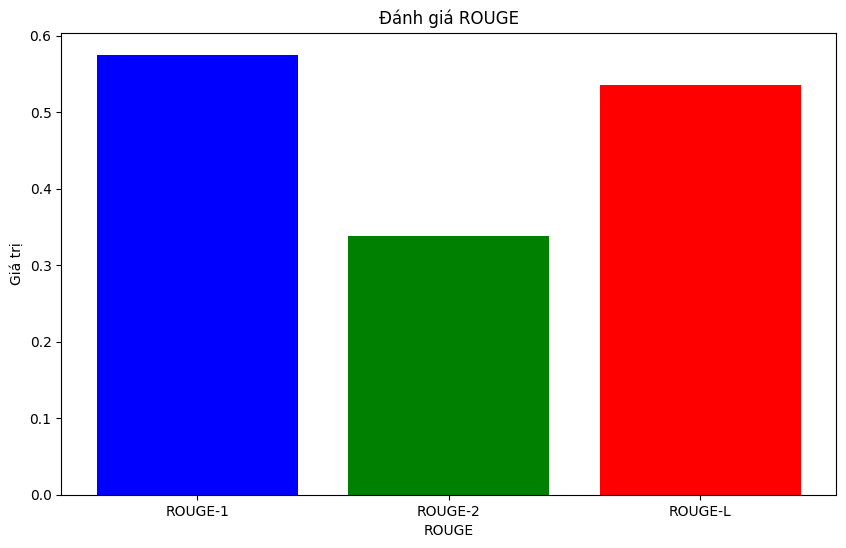

In [4]:
rouge_1 = results['rouge-1'].mean()
rouge_2 = results['rouge-2'].mean()
rouge_l = results['rouge-l'].mean()

#Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#Thêm màu của từng cột
plt.bar(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'], [rouge_1, rouge_2, rouge_l], color=['blue', 'green', 'red'])
plt.title('Đánh giá ROUGE')
plt.xlabel('ROUGE')
plt.ylabel('Giá trị')
plt.show()